In [1]:
import pandas as pd
import numpy as np
import time
import scikitplot as skplt

df = pd.read_pickle("./data.pkl")

In [2]:
# Get numerical features with Natural Language Toolkit
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

lyrics = df['lyrics']
sWords = stopwords.words('english')
sWords.extend(('got', 'get', 'gets' 'getting', '2X', '2x', 'x2', 'x3', 'x4', 'x2chorus', 'chorus', 'verse', 'bridge', 'd\xe3', 'n\xe3', 'm\xe3', 'the', 'it', 'is', "it's", 'are', 'were', 'a', 'an', 'its', 'of', 'for'))

tfidfconverter = TfidfVectorizer(norm='l2', use_idf=True, smooth_idf=True, ngram_range = (1,2), max_features=1000, min_df=3, max_df=0.7, stop_words=sWords)
n_features = tfidfconverter.fit_transform(lyrics)
df['n_features'] = list(n_features.toarray())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nickruspantini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/feature_extraction/text.py:153: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  tokens = [w for w in tokens if w not in stop_words]


In [3]:
# Get top ranking words
features = (tfidfconverter.get_feature_names()) 
sums = n_features.sum(axis = 0) 
data = [] 
for col, term in enumerate(features): 
    data.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print (words.head(10))
#print tfidfconverter.get_stop_words()
#print tfidfconverter.get_feature_names()

      term         rank
507   love  9603.486619
438   know  8380.652668
475   like  8303.497004
607     oh  6499.606956
615    one  6374.867464
874   time  6301.769009
585  never  6137.866518
731    see  6061.003503
327     go  5793.165852
933   want  5537.147598


In [22]:
# X: Bag of words model with polarity scores, word count
def f(row):    
    np.append(row[5], row[0])
    np.append(row[5], row[1])
    np.append(row[5], row[2])
    np.append(row[5], row[3])
    return np.append(row[5], row[4])

X = np.vstack((df['pos_score'], df['neg_score'], df['neu_score'], df['compound_score'], df['word_count'], df['n_features'])).T
X = np.array(map(f, X))


Random Forest Score:  0.7006887777485303
Time Elapsed:  626.023582935

Confusion Matrix:
[[  434     0    19    27    93  2733]
 [    2   144    81     0    88  1114]
 [    8     1  3959    17   282  1326]
 [   24     2    26   359   140   990]
 [   44    15   302    63  2315  5148]
 [  101    13   278    74   634 24732]]

Classification Report:
              precision    recall  f1-score   support

Country/Folk       0.71      0.13      0.22      3306
  Electronic       0.82      0.10      0.18      1429
 Hip-Hop/R&B       0.85      0.71      0.77      5593
        Jazz       0.66      0.23      0.35      1541
         Pop       0.65      0.29      0.40      7887
  Rock/Metal       0.69      0.96      0.80     25832

   micro avg       0.70      0.70      0.70     45588
   macro avg       0.73      0.40      0.45     45588
weighted avg       0.71      0.70      0.65     45588



/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


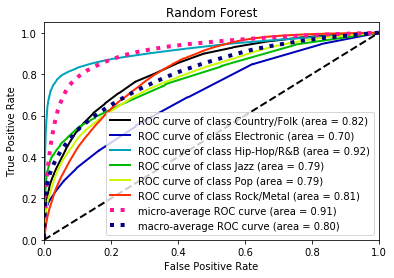


Naive Bayes Score:  0.32971395981398616
Time Elapsed:  13.1335289478

Confusion Matrix:
[[2111  144  135  540  139  237]
 [ 327  383  182  200  152  185]
 [ 505  363 3612  311  509  293]
 [ 559   92   89  593  132   76]
 [2272 1072  833 1397 1652  661]
 [8578 3109 2068 3130 2267 6680]]

Classification Report:
              precision    recall  f1-score   support

Country/Folk       0.15      0.64      0.24      3306
  Electronic       0.07      0.27      0.12      1429
 Hip-Hop/R&B       0.52      0.65      0.58      5593
        Jazz       0.10      0.38      0.15      1541
         Pop       0.34      0.21      0.26      7887
  Rock/Metal       0.82      0.26      0.39     25832

   micro avg       0.33      0.33      0.33     45588
   macro avg       0.33      0.40      0.29     45588
weighted avg       0.60      0.33      0.36     45588



/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


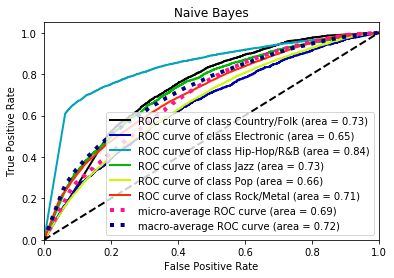


K Nearest Neighbor Score:  0.5199613933491269
Time Elapsed:  149.417825937

Confusion Matrix:
[[  641   103   150   106   443  1863]
 [  126   130   148    34   180   811]
 [  230   122  3603    46   470  1122]
 [  186    61    90   230   218   756]
 [  732   312   948   251  2020  3624]
 [ 2521   931  1522   572  3206 17080]]

Classification Report:
              precision    recall  f1-score   support

Country/Folk       0.14      0.19      0.17      3306
  Electronic       0.08      0.09      0.08      1429
 Hip-Hop/R&B       0.56      0.64      0.60      5593
        Jazz       0.19      0.15      0.17      1541
         Pop       0.31      0.26      0.28      7887
  Rock/Metal       0.68      0.66      0.67     25832

   micro avg       0.52      0.52      0.52     45588
   macro avg       0.33      0.33      0.33     45588
weighted avg       0.52      0.52      0.52     45588



/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


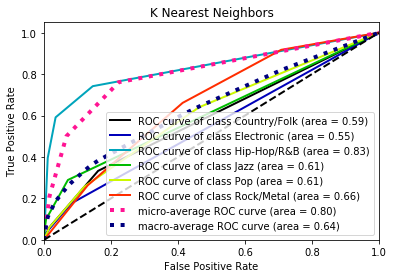


Decision Tree Score:  0.5821268754935509
Time Elapsed:  327.374958992

Confusion Matrix:
[[  759    59   104   135   476  1773]
 [   75   195   109    22   245   783]
 [  112    79  3588    64   577  1173]
 [  136    27    57   438   230   653]
 [  416   237   537   252  2915  3530]
 [ 1455   706   957   603  3468 18643]]

Classification Report:
              precision    recall  f1-score   support

Country/Folk       0.26      0.23      0.24      3306
  Electronic       0.15      0.14      0.14      1429
 Hip-Hop/R&B       0.67      0.64      0.66      5593
        Jazz       0.29      0.28      0.29      1541
         Pop       0.37      0.37      0.37      7887
  Rock/Metal       0.70      0.72      0.71     25832

   micro avg       0.58      0.58      0.58     45588
   macro avg       0.41      0.40      0.40     45588
weighted avg       0.58      0.58      0.58     45588



/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


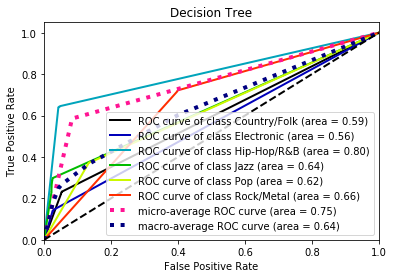

In [71]:
# TEST: Random Forest vs Naive Bayes vs K Nearest Neighbors vs Decision Tree

y = df['genre']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)


# Random Forest
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators=100, random_state=0)
startTime = time.time()
RFclassifier.fit(X_train, y_train)
print "\nRandom Forest Score: ", RFclassifier.score(X_test, y_test)
print "Time Elapsed: ", time.time() - startTime
preds = RFclassifier.predict(X_test)
print "\nConfusion Matrix:"
print(sklearn.metrics.confusion_matrix(y_test, preds))
print "\nClassification Report:"
print sklearn.metrics.classification_report(y_test, preds)
y_true = y_test
y_probas = RFclassifier.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.title('Random Forest')
plt.show()


# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
startTime = time.time()
NBclassifier.fit(X_train, y_train)
print "\nNaive Bayes Score: ", NBclassifier.score(X_test, y_test)
print "Time Elapsed: ", time.time() - startTime
preds = NBclassifier.predict(X_test)
print "\nConfusion Matrix:"
print(sklearn.metrics.confusion_matrix(y_test, preds))
print "\nClassification Report:"
print sklearn.metrics.classification_report(y_test, preds)
y_true = y_test
y_probas = NBclassifier.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.title('Naive Bayes')
plt.show()


# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=3)
startTime = time.time()
KNclassifier.fit(X_train, y_train)
print "\nK Nearest Neighbor Score: ", KNclassifier.score(X_test, y_test)
print "Time Elapsed: ", time.time() - startTime
preds = KNclassifier.predict(X_test)
print "\nConfusion Matrix:"
print(sklearn.metrics.confusion_matrix(y_test, preds))
print "\nClassification Report:"
print sklearn.metrics.classification_report(y_test, preds)
y_true = y_test
y_probas = KNclassifier.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.title('K Nearest Neighbors')
plt.show()


# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(random_state=0)
startTime = time.time()
DTclassifier.fit(X_train, y_train)
print "\nDecision Tree Score: ", DTclassifier.score(X_test, y_test)
print "Time Elapsed: ", time.time() - startTime
preds = DTclassifier.predict(X_test)
print "\nConfusion Matrix:"
print(sklearn.metrics.confusion_matrix(y_test, preds))
print "\nClassification Report:"
print sklearn.metrics.classification_report(y_test, preds)
y_true = y_test
y_probas = DTclassifier.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.title('Decision Tree')
plt.show()